<a class="anchor" id="link"></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-0.1">Описание данных:</a></span></li></ul></li><li><span><a href="#Шаг-1.-Загрузка-и-подготовка-данных" data-toc-modified-id="Шаг-1.-Загрузка-и-подготовка-данных-1">Шаг 1. Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Анализ-данных-1-ого-региона" data-toc-modified-id="1.1-Анализ-данных-1-ого-региона-1.1">1.1 Анализ данных 1-ого региона</a></span></li><li><span><a href="#1.2-Анализ-данных-2-ого-региона" data-toc-modified-id="1.2-Анализ-данных-2-ого-региона-1.2">1.2 Анализ данных 2-ого региона</a></span></li><li><span><a href="#1.3-Анализ-данных-3-ого-региона" data-toc-modified-id="1.3-Анализ-данных-3-ого-региона-1.3">1.3 Анализ данных 3-ого региона</a></span></li><li><span><a href="#Вывод-по-этапу-&quot;Загрузка-и-подготовка-данных&quot;" data-toc-modified-id="Вывод-по-этапу-&quot;Загрузка-и-подготовка-данных&quot;-1.4">Вывод по этапу "Загрузка и подготовка данных"</a></span></li></ul></li><li><span><a href="#Шаг-2.-Обучение-и-проверка-модели" data-toc-modified-id="Шаг-2.-Обучение-и-проверка-модели-2">Шаг 2. Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-этапу-&quot;Обучение-и-проверка-модели&quot;" data-toc-modified-id="Вывод-по-этапу-&quot;Обучение-и-проверка-модели&quot;-2.1">Вывод по этапу "Обучение и проверка модели"</a></span></li></ul></li><li><span><a href="#Шаг-3.-Подготовка-к-расчёту-прибыли" data-toc-modified-id="Шаг-3.-Подготовка-к-расчёту-прибыли-3">Шаг 3. Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1">Вывод</a></span></li></ul></li><li><span><a href="#3.1-Функция-для-расчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели" data-toc-modified-id="3.1-Функция-для-расчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели-3.1">3.1 Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Вывод-по-этапу-&quot;Подготовка-к-расчету-прибыли&quot;" data-toc-modified-id="Вывод-по-этапу-&quot;Подготовка-к-расчету-прибыли&quot;-3.2">Вывод по этапу "Подготовка к расчету прибыли"</a></span></li></ul></li><li><span><a href="#Шаг-4.-Расчёт-прибыли-и-рисков" data-toc-modified-id="Шаг-4.-Расчёт-прибыли-и-рисков-4">Шаг 4. Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-этапу-&quot;Расчет-прибыли-и-рисков&quot;" data-toc-modified-id="Вывод-по-этапу-&quot;Расчет-прибыли-и-рисков&quot;-4.1">Вывод по этапу "Расчет прибыли и рисков"</a></span></li></ul></li><li><span><a href="#Шаг-5.-Общий-вывод" data-toc-modified-id="Шаг-5.-Общий-вывод-5">Шаг 5. Общий вывод</a></span></li></ul></div>

# Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски требуется техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.
<br>

### Описание данных:

Признаки:
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек.

Целевой признак:
- `product` — объём запасов в скважине (тыс. баррелей).


## Шаг 1. Загрузка и подготовка данных
[Вернуться к содержанию](#link)

Изучим общую информацию о датасетах.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

STATE = 12345

In [2]:
# сделаем настройку

# снимем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

# снимем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# выставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавим стиль графиков
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

In [3]:
# загрузим данные и сохраним их в переменные
try: 
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
    
except: 
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [4]:
# напишем функцию для автоматизации анализа данных каждого региона
def region_info(data):
    
    # выведем 5 случайных строк на экран
    print('\n5 первых строк датафрейма:')
    display(data.head(5)) 
    
    # изучим общую информацию о датафрейме
    print('\nОбщая информация о датафрейме:\n')
    display(data.info()) 
    
    # определим процент пропущенных значений в каждом столбце
    print('\nПроцент пропущенных значений:')
    display(data.isna() \
                .sum() \
                .sort_values(ascending=False) \
                / data.shape[0] * 100) 
    
    # проверим наличие дубликатов
    print('\nКоличество дубликатов:')
    display(data.duplicated().sum()) 
    
    
    #вычислим коэффициенты корреляции
    print('\nКоэффициенты корреляции:') 
    plt.figsize=(16, 8)
    correlation = data.corr()
    plt.figure(figsize = (15, 6))
    sns.heatmap(correlation, annot = True, cmap="Blues")
    plt.show() 
    
    #построим гистограммы для признаков
    print('\nГистограммы признаков:') 
    data.hist(figsize=(15, 20), layout=(6, 2), color = '#AFCFEA', ec='k')
    plt.show()

### 1.1 Анализ данных 1-ого региона


5 первых строк датафрейма:


,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
3,iJLyR,-0.03,0.14,2.98,168.62
4,Xdl7t,1.99,0.16,4.75,154.04



Общая информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Процент пропущенных значений:


id        0.00
f0        0.00
f1        0.00
f2        0.00
product   0.00
dtype: float64


Количество дубликатов:


0


Коэффициенты корреляции:


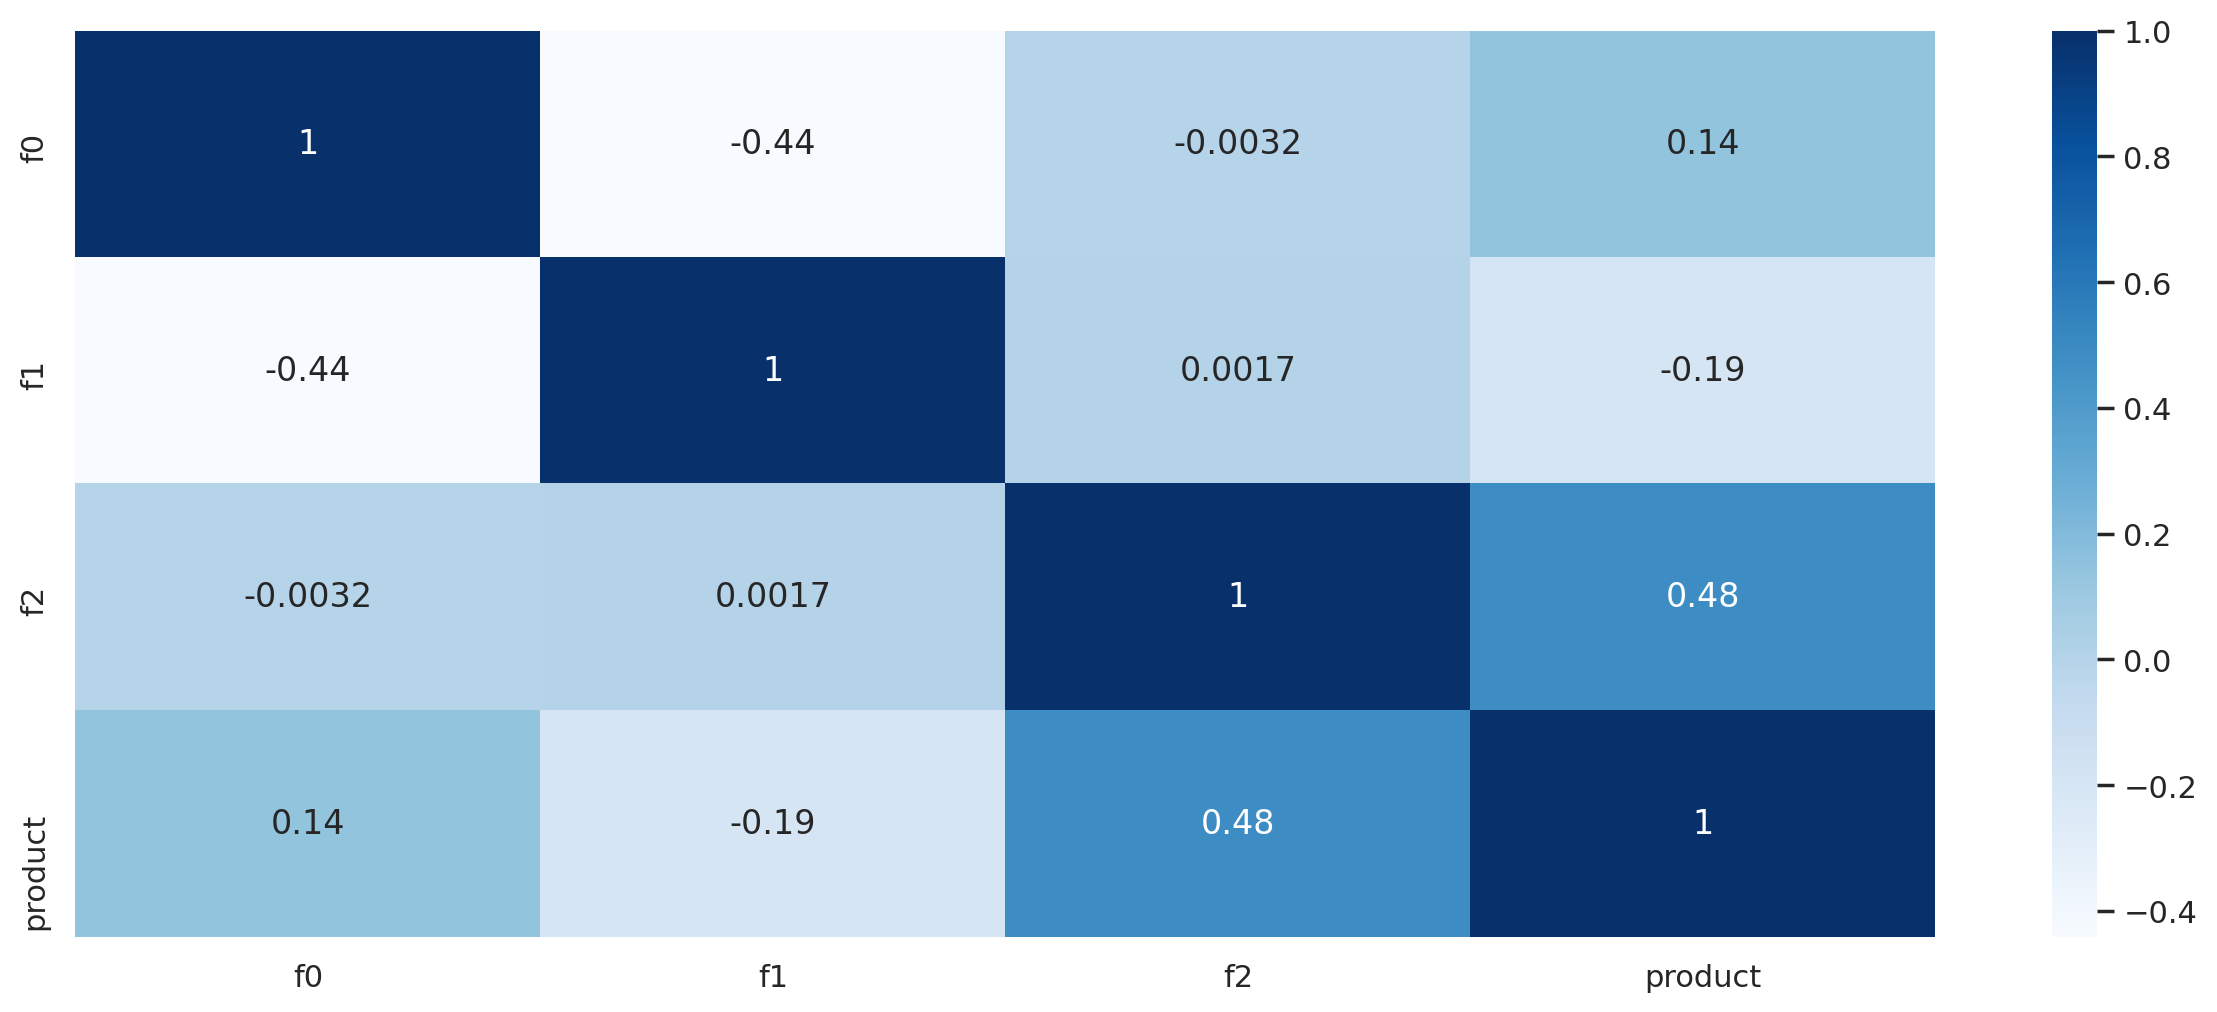


Гистограммы признаков:


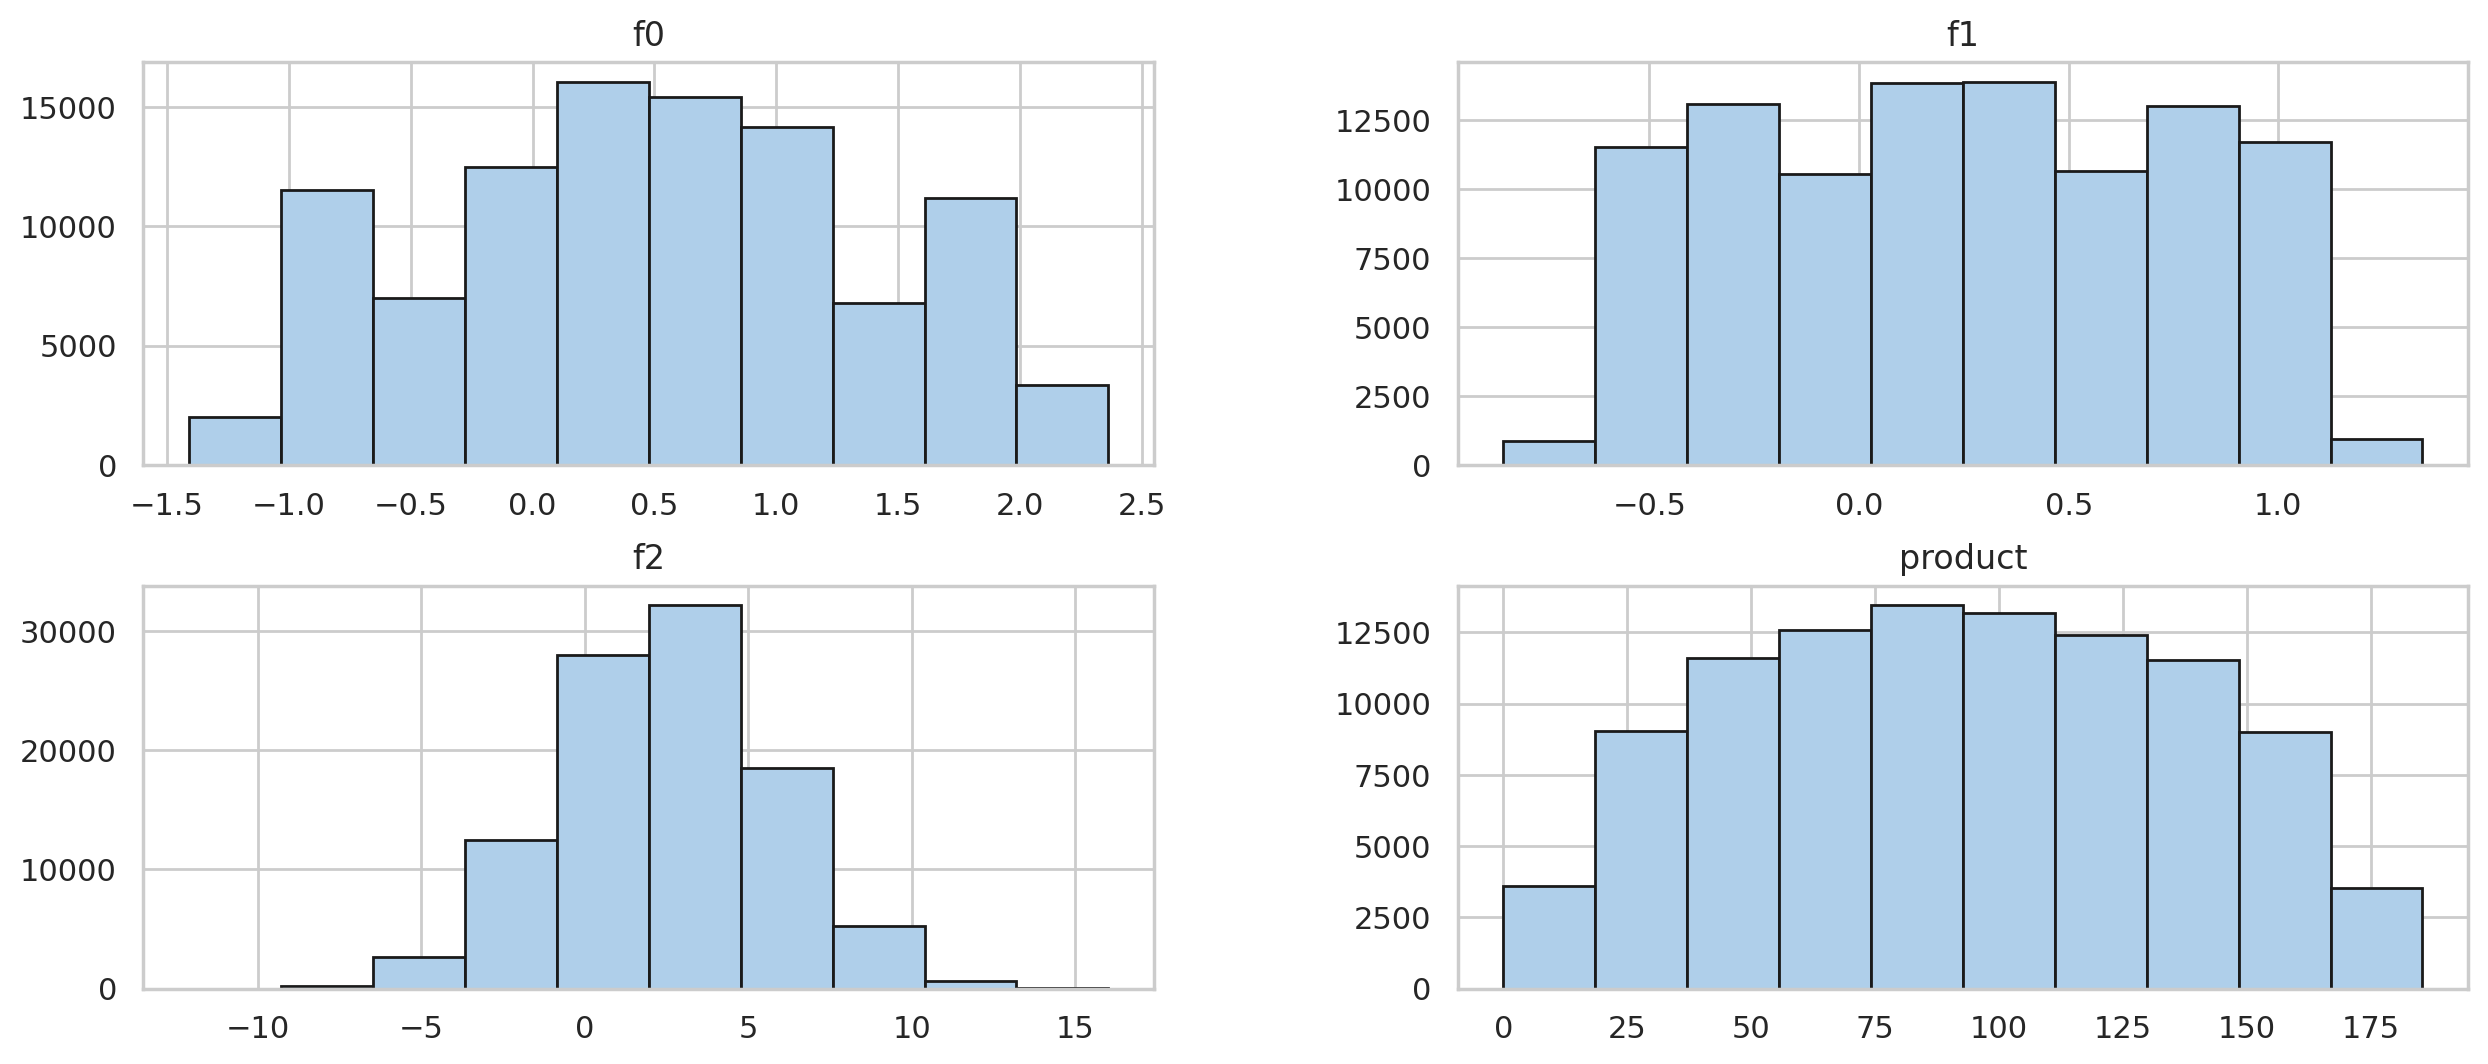

In [5]:
region_info(data_0)

### 1.2 Анализ данных 2-ого региона


5 первых строк датафрейма:


,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
3,KcrkZ,-13.08,-11.51,5.00,137.95
4,AHL4O,12.70,-8.15,5.00,134.77



Общая информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Процент пропущенных значений:


id        0.00
f0        0.00
f1        0.00
f2        0.00
product   0.00
dtype: float64


Количество дубликатов:


0


Коэффициенты корреляции:


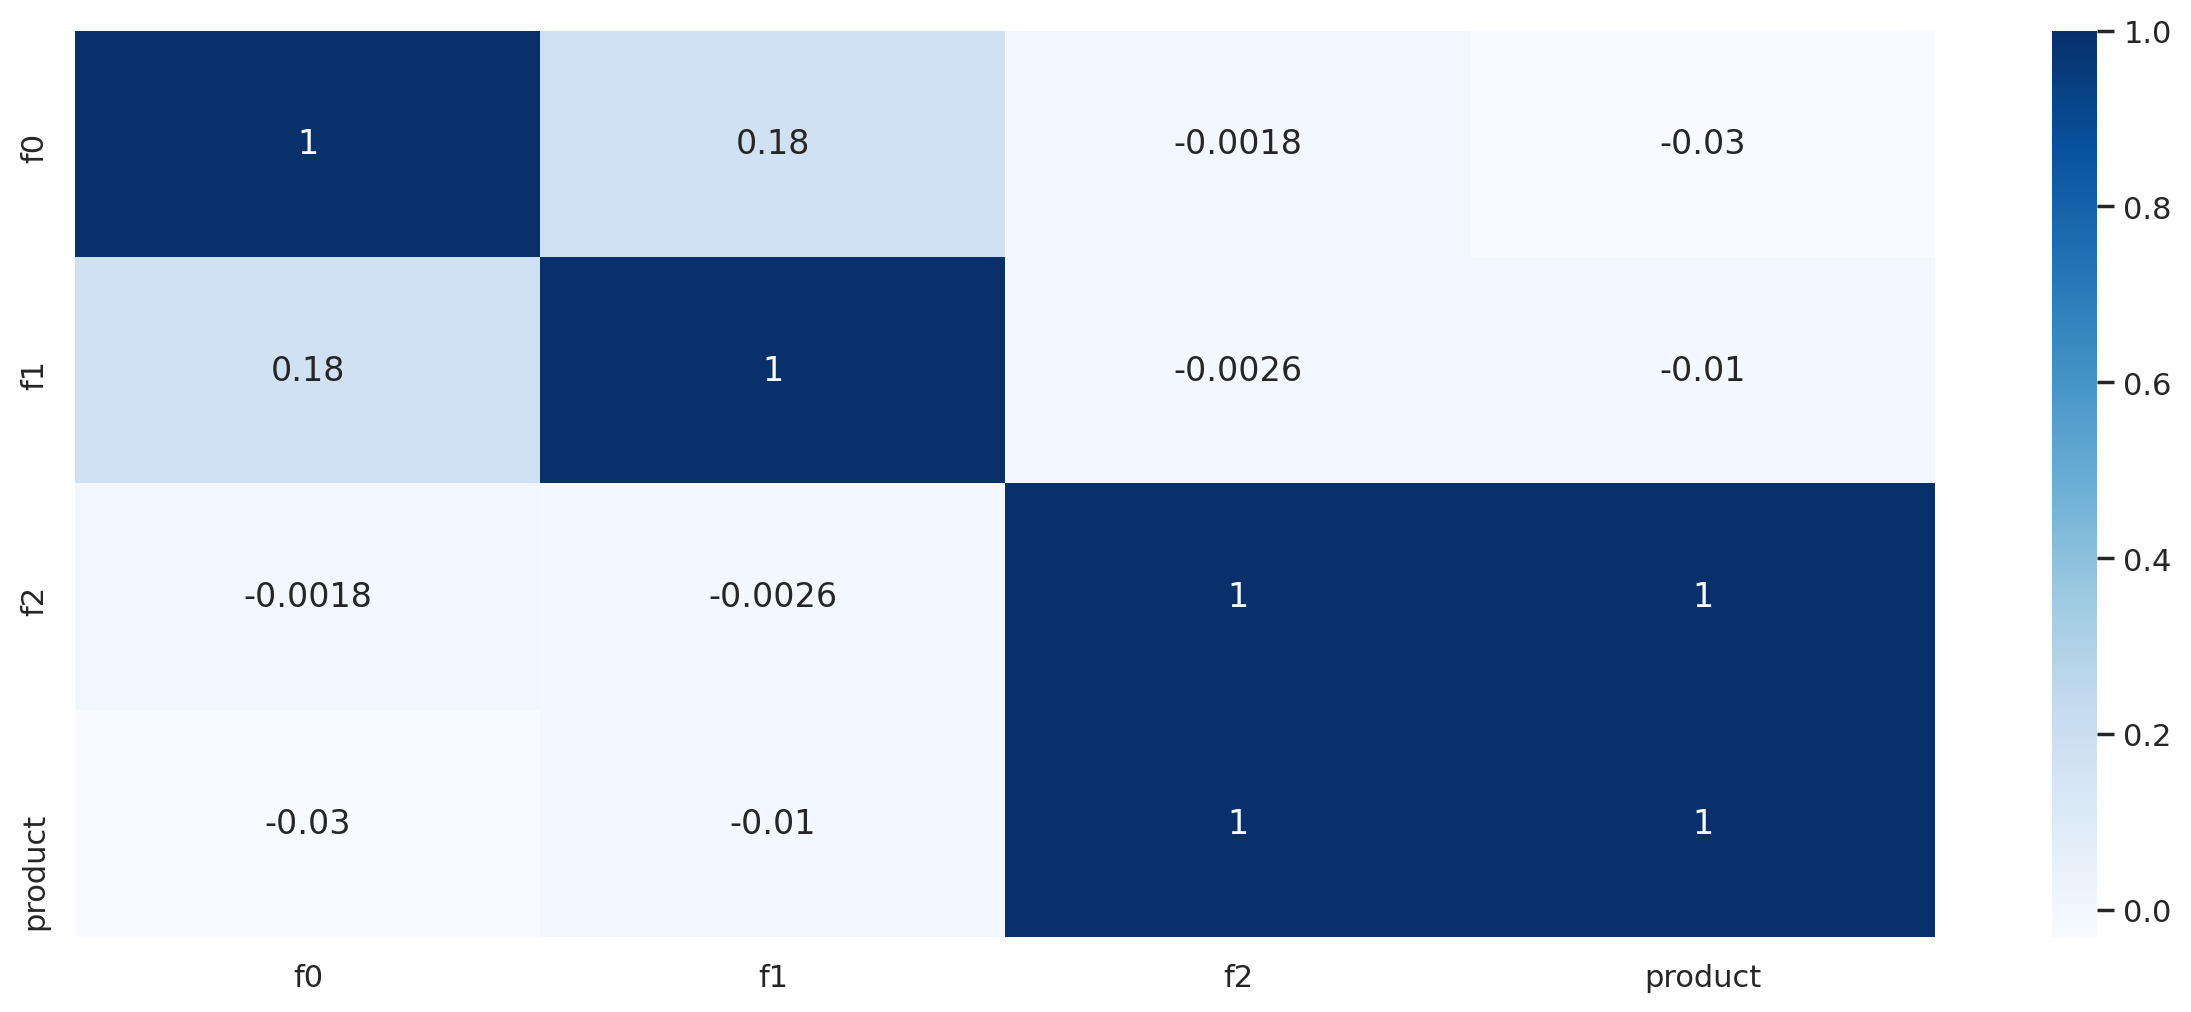


Гистограммы признаков:


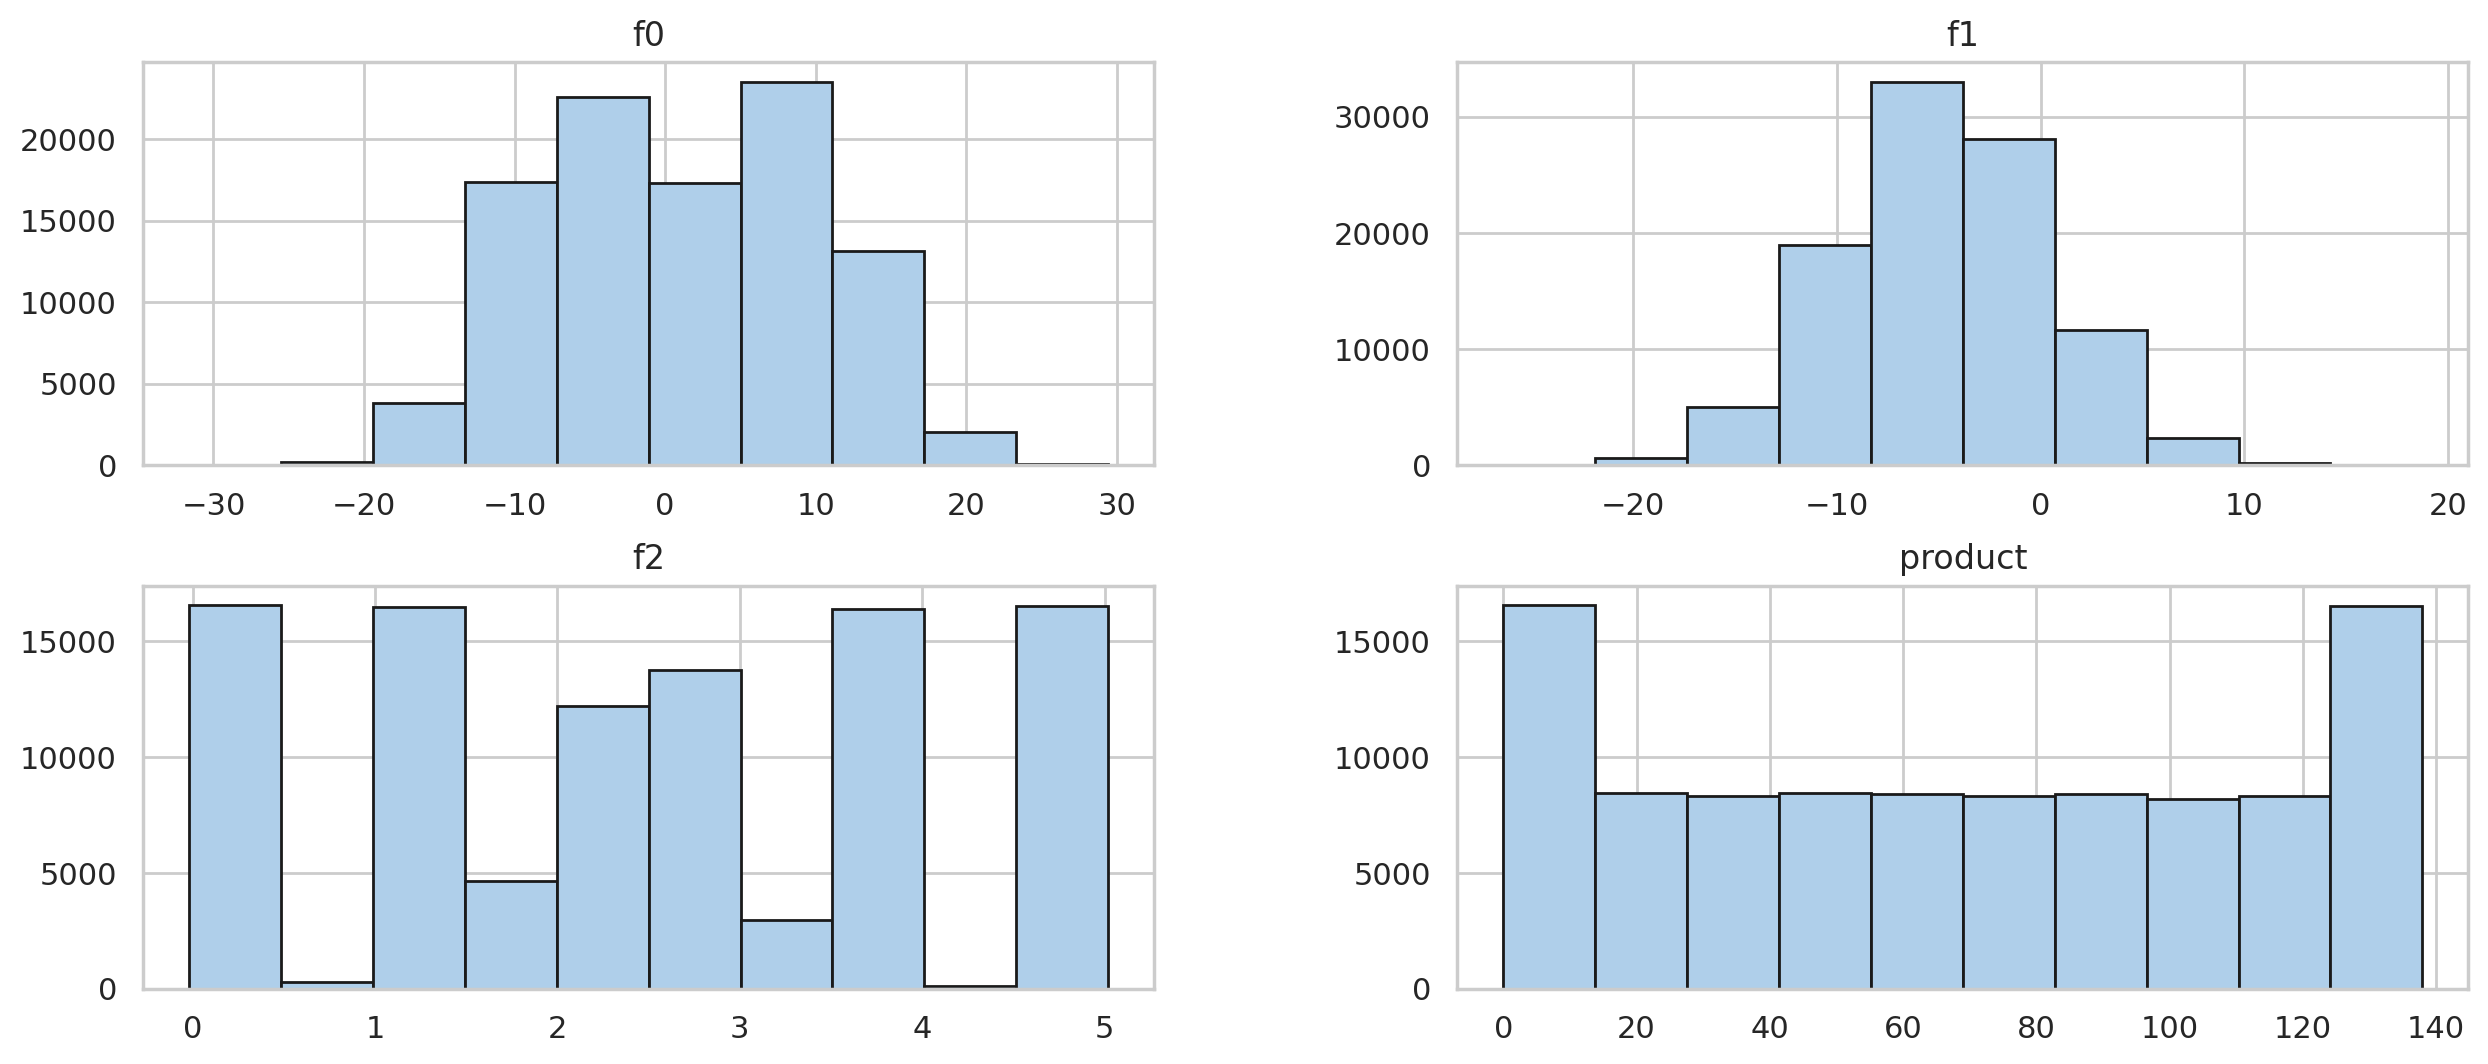

In [6]:
region_info(data_1)

### 1.3 Анализ данных 3-ого региона


5 первых строк датафрейма:


,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
3,q6cA6,2.24,-0.55,0.93,114.57
4,WPMUX,-0.52,1.72,5.90,149.60



Общая информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Процент пропущенных значений:


id        0.00
f0        0.00
f1        0.00
f2        0.00
product   0.00
dtype: float64


Количество дубликатов:


0


Коэффициенты корреляции:


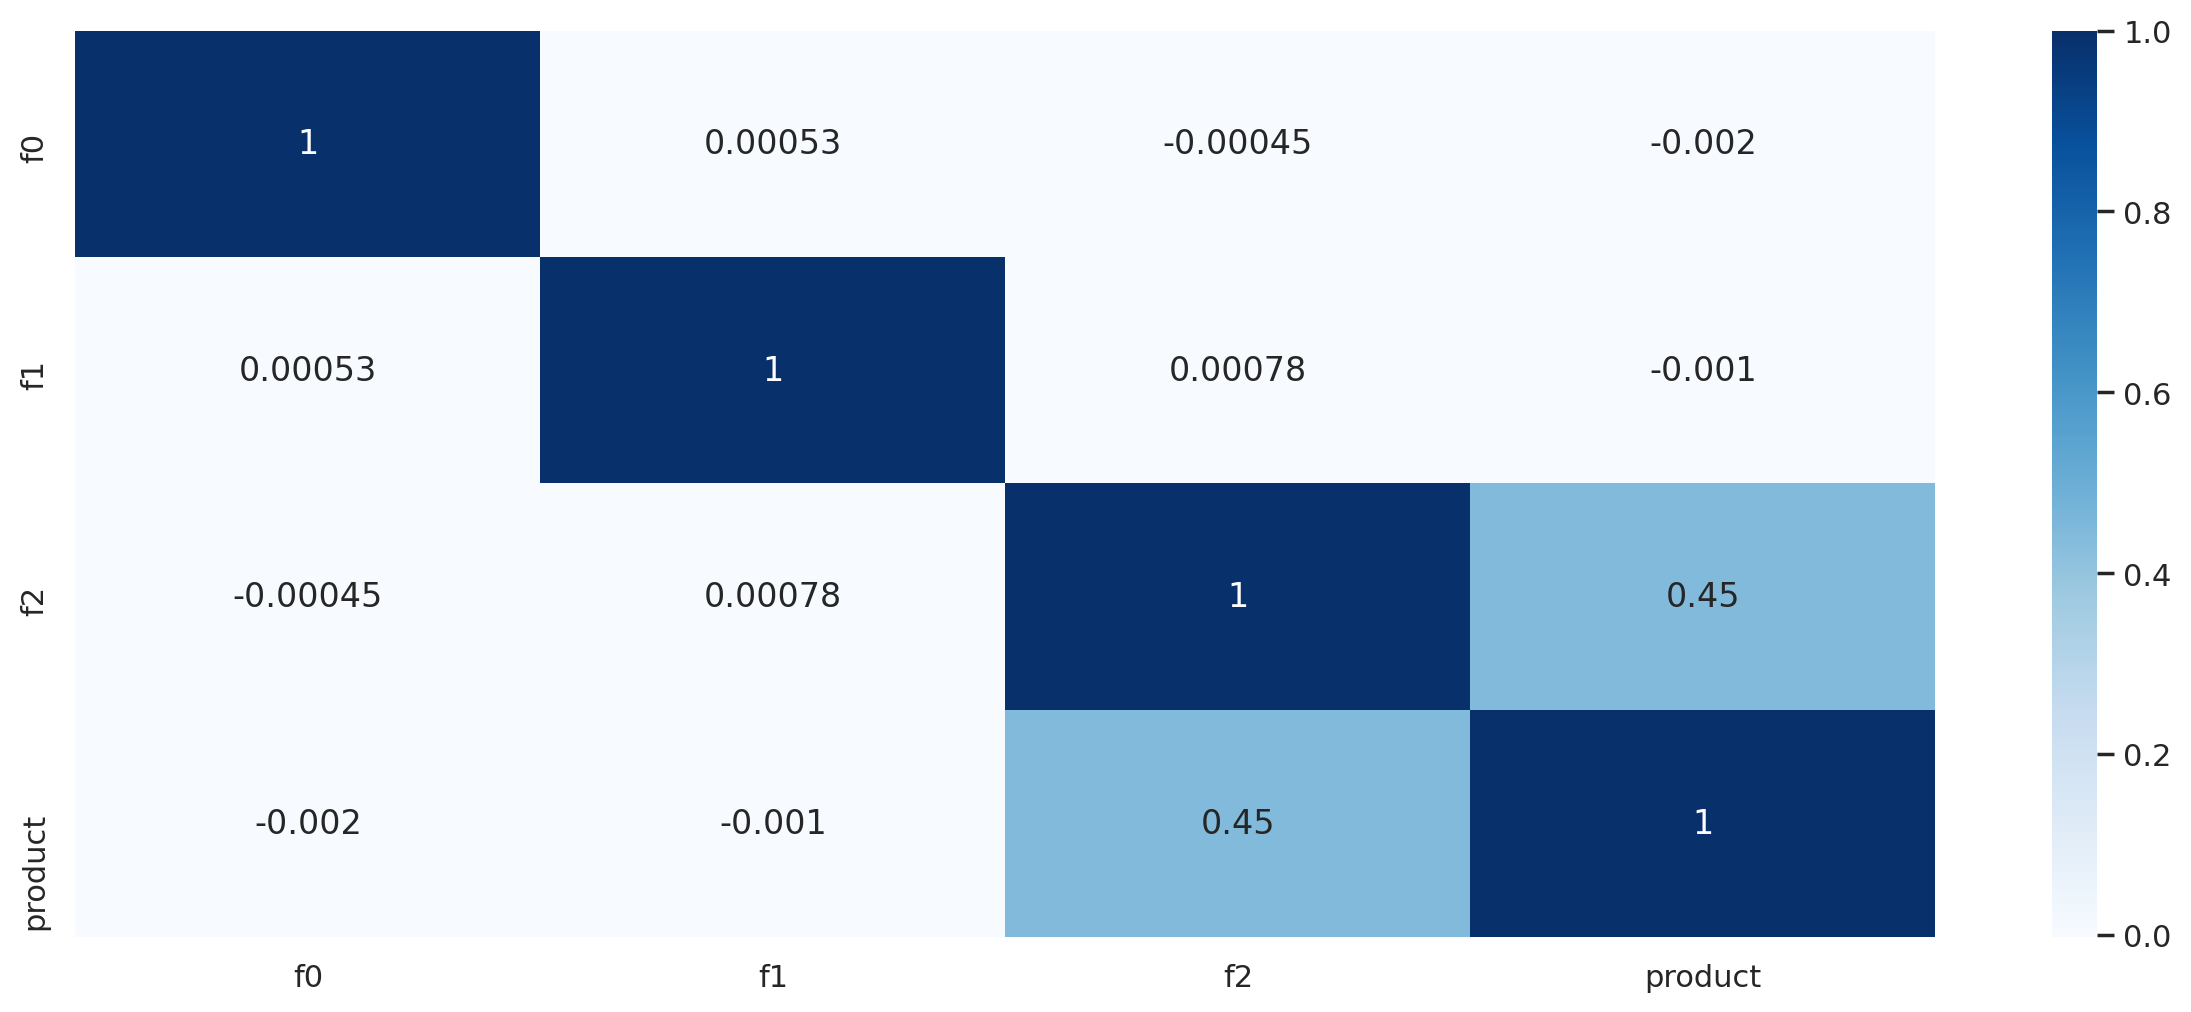


Гистограммы признаков:


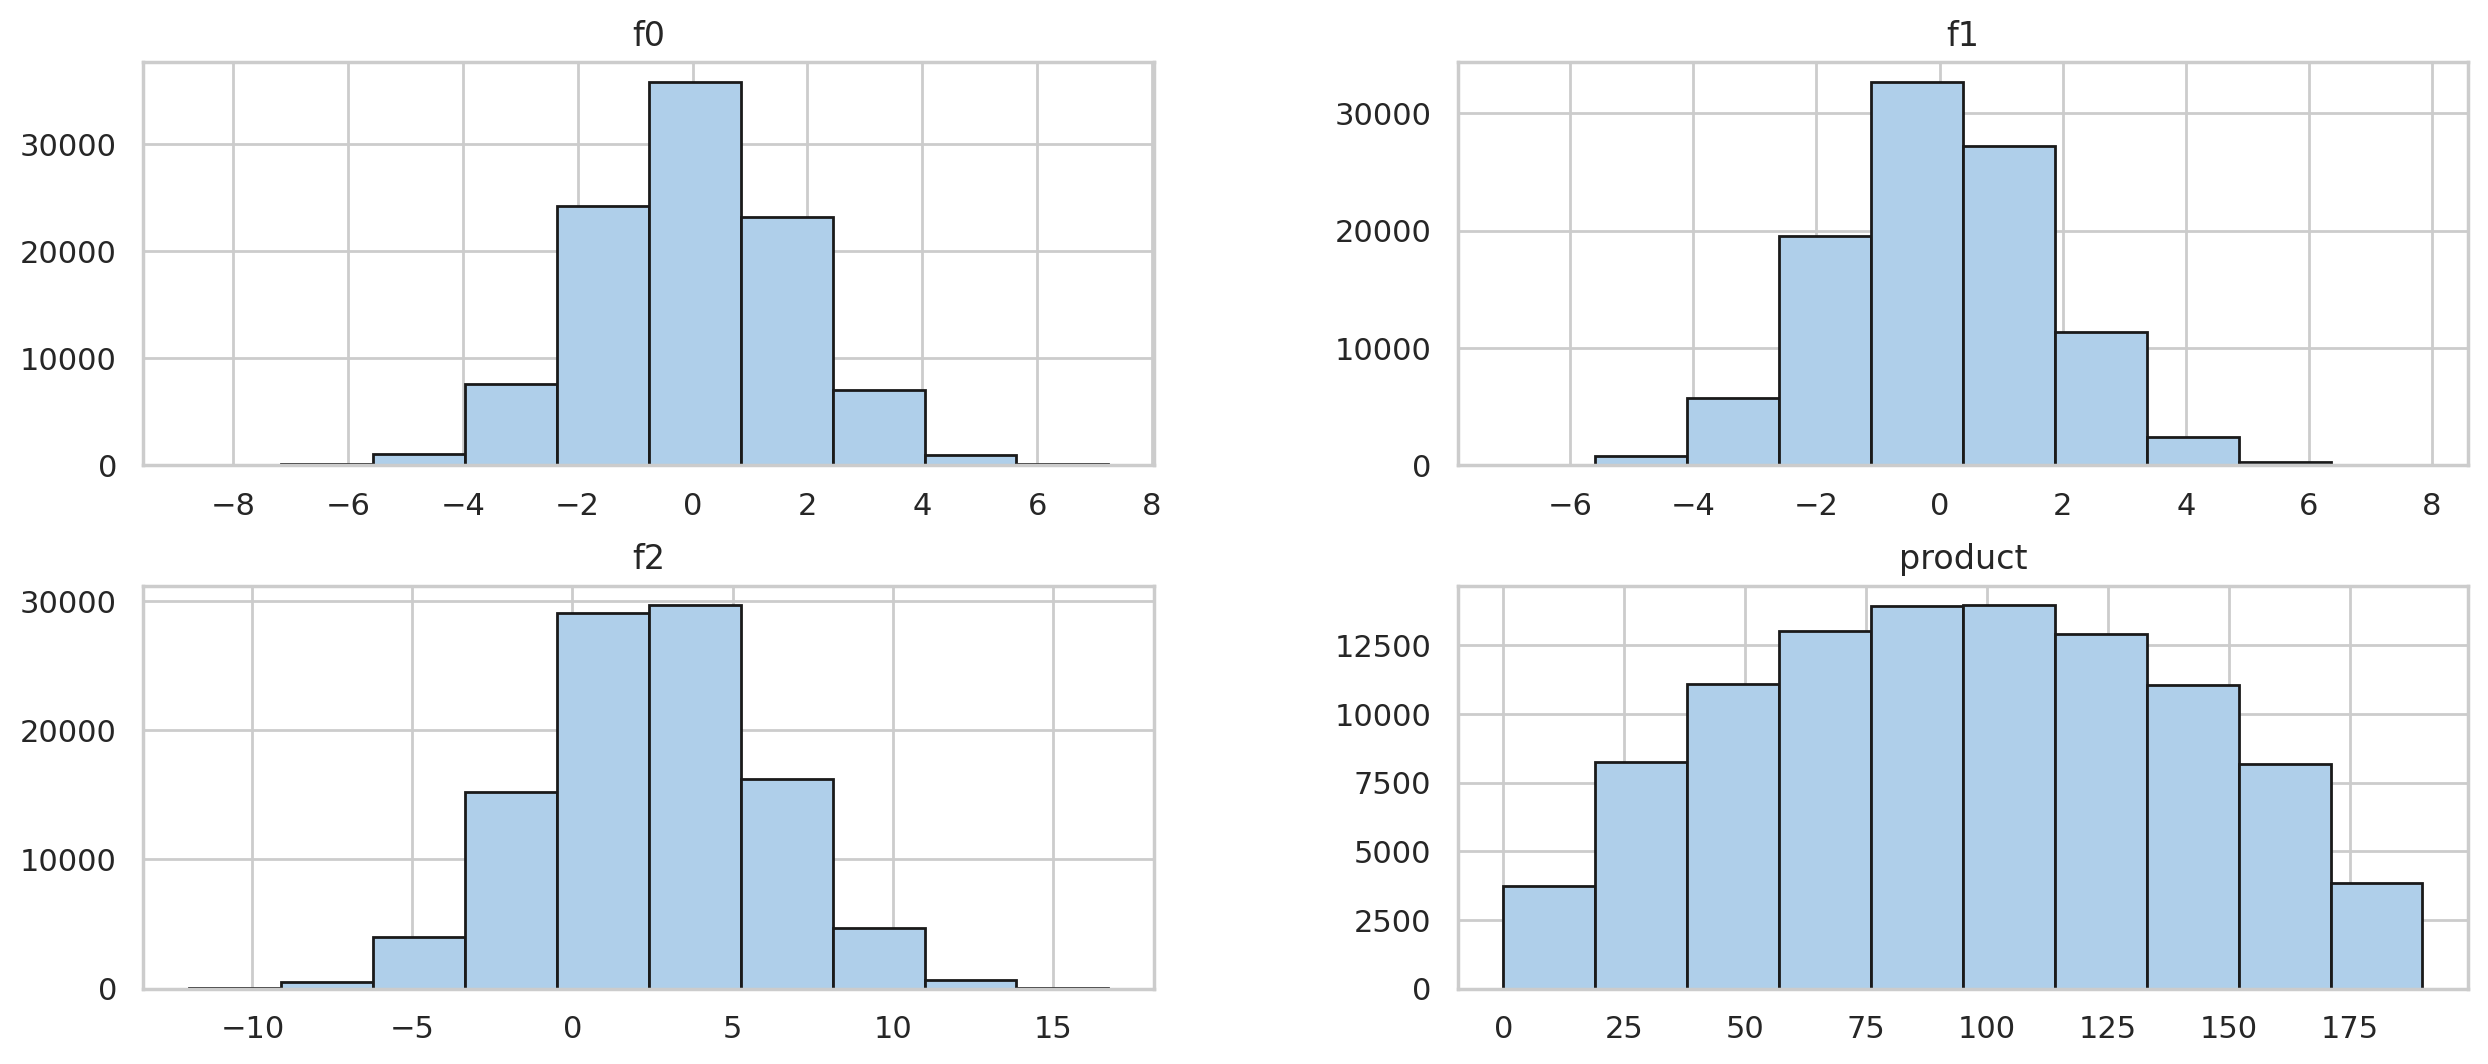

In [7]:
region_info(data_2)

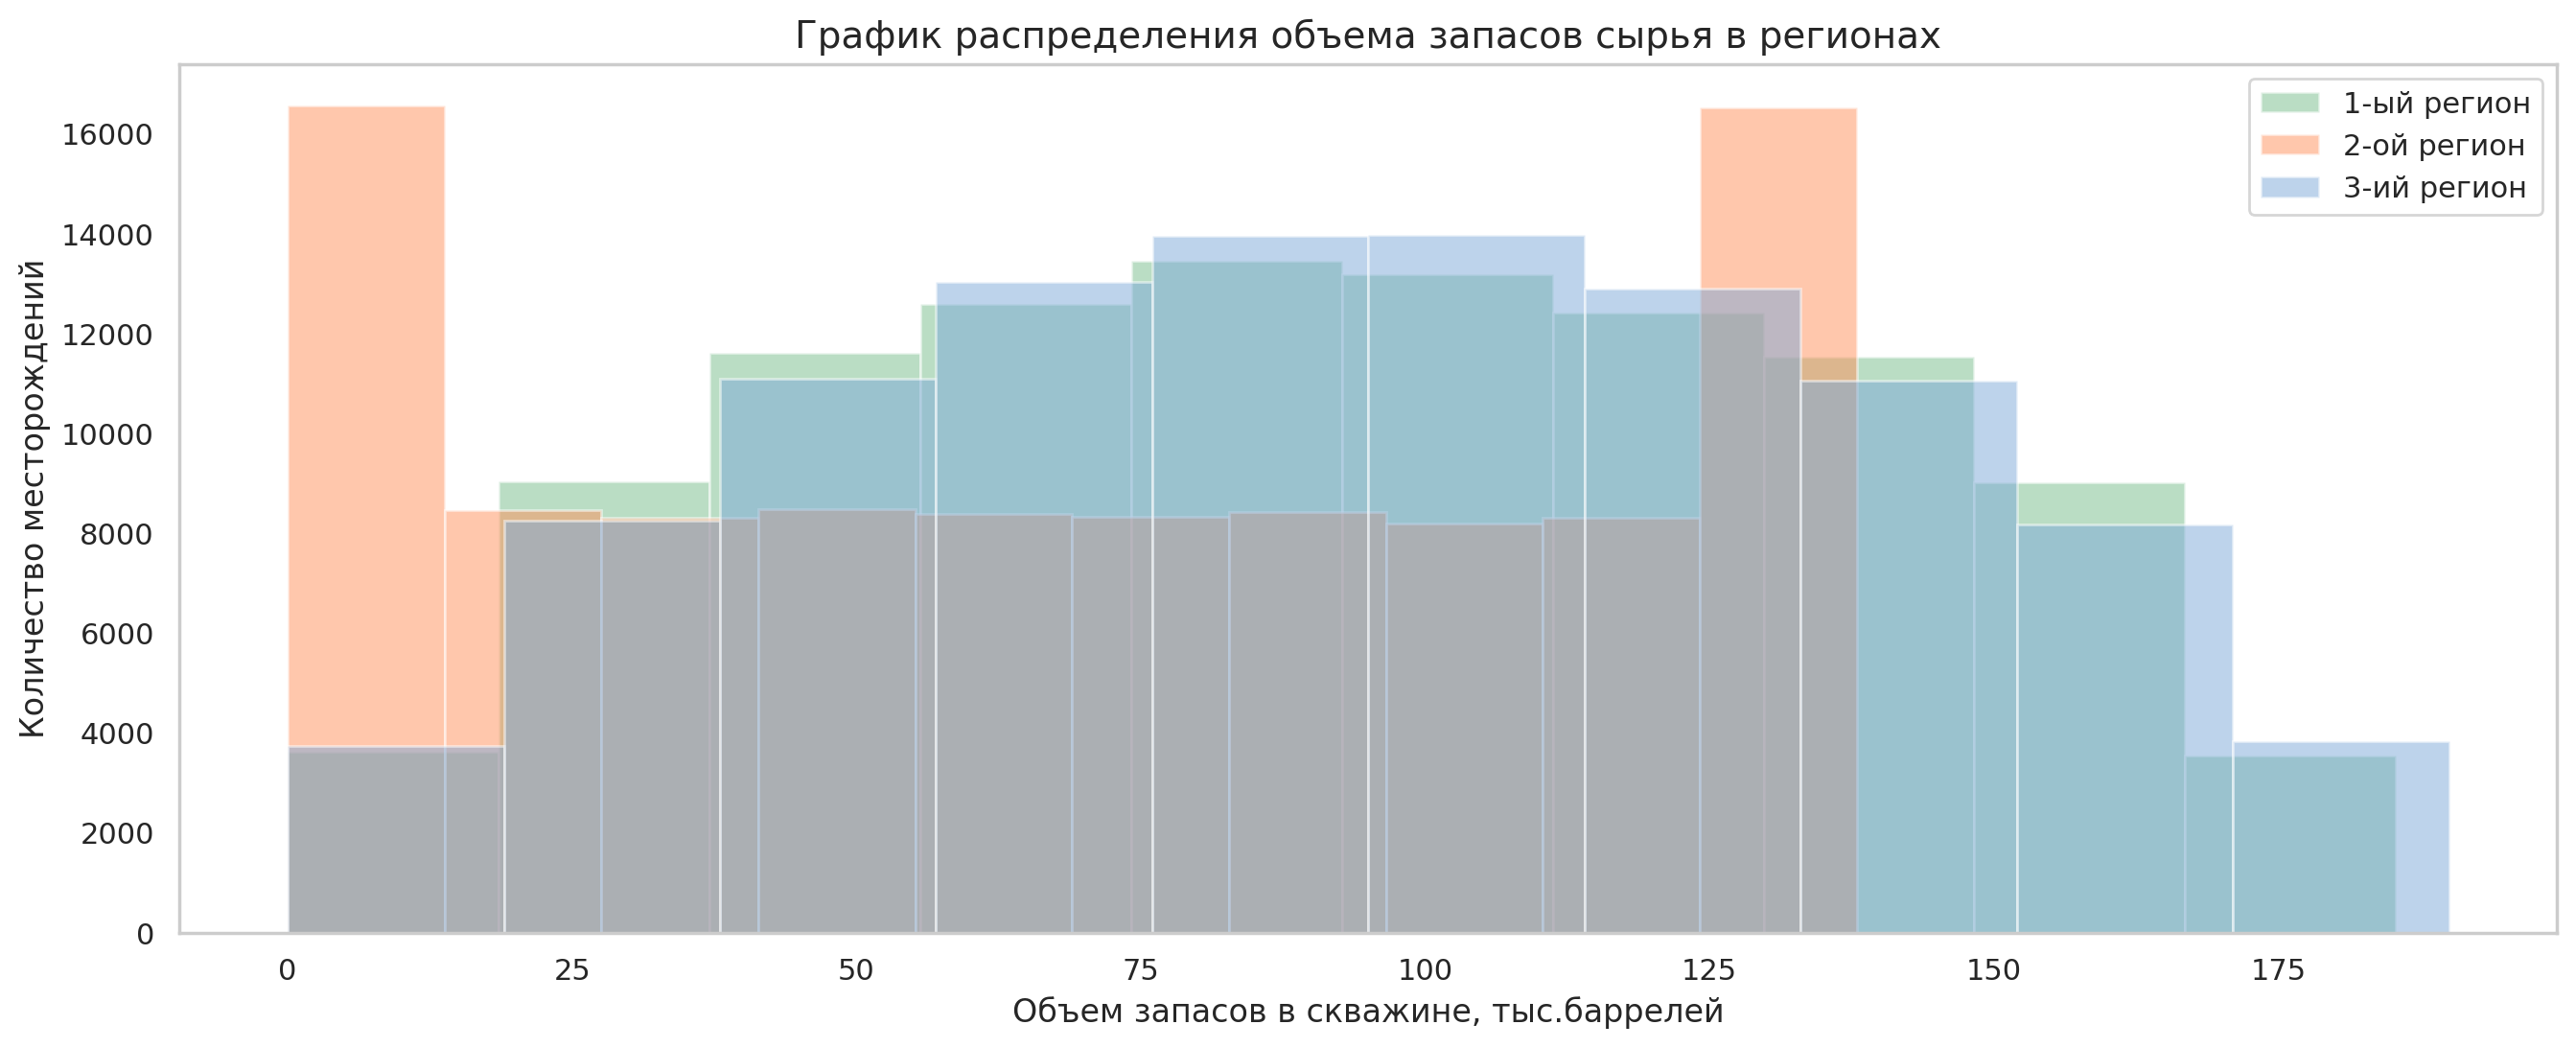

In [8]:
# построим распределение запасов сырья для каждого региона
plt.figure(figsize=(16, 6))

data_0['product'].plot(kind='hist', alpha=0.5, label='1-ый регион', color = '#77BD8B')
data_1['product'].plot(kind='hist', alpha=0.5, label='2-ой регион', color = '#FF905A')
data_2['product'].plot(kind='hist', alpha=0.5, label='3-ий регион', color = '#7ca9d8')

plt.title('График распределения объема запасов сырья в регионах', fontsize=14)
plt.xlabel('Объем запасов в скважине, тыс.баррелей',  fontsize=12)
plt.ylabel('Количество месторождений',  fontsize=12)
plt.legend()
plt.grid()
plt.show()

### Вывод по этапу "Загрузка и подготовка данных"

1. Файлы содержат данные геологоразведки трёх регионов с 100000 месторождений, каждое из которых описывается 5-ю признаками. Все признаки количественные.


2. Данные не требуют дополнительной предобработки.


3. На графике распределения объема запасов сырья в регионах видим отличающуюся кривую распределения запасов сырья по скважинам 2 региона, какое значение это может сыграть при анализе рентабильности разработки скважин в данном регионе посмотрим далее.


4. По данным корреляции 2-ого региона, видим сильную зависимость целевого признака 'product' от 'f2', такая зависмость можеть дать высокие баллы предсказаний для нашей модели.

## Шаг 2. Обучение и проверка модели
[Вернуться к содержанию](#link)

Обучим и проверим модель для каждого региона:
   - Разобьем данные на обучающую и тестовую выборки в соотношении 75:25,
   - Обучим модель и сделаем предсказания на тестовой выборке,
   - Сохраним предсказания и правильные ответы на тестовой выборке,
   - Определим средний запас предсказанного сырья и RMSE модели,
   - Проанализируем результаты.

In [9]:
# напишем функцию для автоматизации процесса
TEST_SIZE= 0.25

def region_model(data):
    features = data.drop(['product', 'id'], axis=1)
    target = data['product'] 
    features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=TEST_SIZE, 
                                                                                  random_state=STATE)
    pd.options.mode.chained_assignment = None
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    features_train[numeric] = scaler.fit_transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    model = LinearRegression()
    scores = cross_val_score(model, features, target, cv=5, scoring='neg_root_mean_squared_error')
    rmse = scores.mean()
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    predictions = pd.Series(predictions)
    average_product = sum(predictions) / len(predictions)
    
    return abs(rmse), average_product, pd.Series(predictions), target_test.reset_index(drop=True)

In [10]:
# cохраним предсказания и правильные ответы на валидационной выборке
rmse_0, average_product_0, predictions_0, target_valid_0 = region_model(data_0)
rmse_1, average_product_1, predictions_1, target_valid_1 = region_model(data_1)
rmse_2, average_product_2, predictions_2, target_valid_2 = region_model(data_2)

In [11]:
# отобразим результаты в таблице
region_table = pd.DataFrame(
    index=['Среднеквадратичная ошибка RMSE модели', 'Cредний запас предсказанного сырья (тыс. баррелей)',
          'Истинное среднее запаса сырья (тыс. баррелей)'], 
    columns=['1-ый регион','2-ой регион','3-ий регион'])

region_table['1-ый регион'] = round(rmse_0, 2), round(average_product_0, 2), round(data_0['product'].mean(), 2)
region_table['2-ой регион'] = round(rmse_1, 2), round(average_product_1, 2), round(data_1['product'].mean(), 2)
region_table['3-ий регион'] = round(rmse_2, 2), round(average_product_2, 2), round(data_2['product'].mean(), 2)
region_table

,1-ый регион,2-ой регион,3-ий регион
Среднеквадратичная ошибка RMSE модели,37.69,0.89,40.06
Cредний запас предсказанного сырья (тыс. баррелей),92.59,68.73,94.97
Истинное среднее запаса сырья (тыс. баррелей),92.50,68.83,95.00


### Вывод по этапу "Обучение и проверка модели"


1. Для каждого региона обучена модель линейной регрессии и получены предсказания среднего запаса сырья в скважине;


2. По данным модели наибольший средний запас сырья наблюдается в 1-ом и 3-ем регионе (92.6 и 95 тыс. баррелей соответственно). Наименьший средний запас сырья во 2-ом регионе - 68.7 тыс. баррелей;


3. Наименьшая среднеквадратичная ошибка RMSE наблюдается в модели линейной регрессии 2-ого региона (0.9). В этом регионе в среднем меньше и запасов сырья. Распределение запасов сырья для 2-ого региона также заметно отличалось от 2-ух других регионов.


## Шаг 3. Подготовка к расчёту прибыли
[Вернуться к содержанию](#link)

При разведке региона исследуют **500 точек**, из которых с помощью машинного обучения выбирают **200 лучших** для разработки. Бюджет на разработку скважин в регионе — **10 млрд рублей**. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет **450 тыс. рублей**, поскольку объём указан в тысячах баррелей. После оценки рисков нужно оставить лишь те регионы, в которых **вероятность убытков меньше 2.5%**. Среди них выбирают регион с наибольшей средней прибылью.

Подготовимся к расчёту прибыли:

- Все ключевые значения для расчётов сохраним в отдельных переменных,
- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе,
- Напишем выводы по этапу подготовки расчёта прибыли,
- Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

In [12]:
# создадим новые переменные
total_points_count = 500
best_points_count = 200
budget = 10000000000
income_per_unit = 450000
loss_probability = 0.025

In [13]:
# оценим бюджет на разработку одной скважины
print('Бюджет на разработку одной скважины:', budget / (1000000 * best_points_count), 'млн. рублей')

Бюджет на разработку одной скважины: 50.0 млн. рублей


In [14]:
# рассчитаем достаточный объём сырья для безубыточной разработки новой скважины
print('Достаточный объём сырья для безубыточной разработки новой скважины:', 
      round(budget / (best_points_count * income_per_unit), 2), 'тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


In [15]:
# определим средний запас сырья в каждом регионе
print('Средний запас сырья в 1-ом регионе', round(data_0['product'].mean(), 2), 'тыс. баррелей')
print('Средний запас сырья во 2-ом регионе', round(data_1['product'].mean(), 2), 'тыс. баррелей')
print('Средний запас сырья в 3-ем регионе', round(data_2['product'].mean(), 2), 'тыс. баррелей')

Средний запас сырья в 1-ом регионе 92.5 тыс. баррелей
Средний запас сырья во 2-ом регионе 68.83 тыс. баррелей
Средний запас сырья в 3-ем регионе 95.0 тыс. баррелей


#### Вывод 

Средний запас сырья скважин в каждом разрабатываемом регионе ниже необходимого для безубыточной разработки запаса. Необходимый запас - 111 тыс. баррелей.


### 3.1 Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 - Выберем скважины с максимальными значениями предсказаний,
 - Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям,
 - Рассчитаем прибыль для полученного объёма сырья.

In [16]:
# напишем функцию для расчета прибыли по каждому региону
def profit_by_region (predict, target, points_count):
    target.reset_index(drop=True , inplace=True)
    predict.reset_index(drop=True , inplace=True)
    predict_sorted = predict.sort_values(ascending=False)
    selected_points = target[predict_sorted.index][:points_count]

    # debug
    if sorted(predict_sorted[:points_count].index) != sorted(selected_points.index):
        print("Index Error!")
    if target[predict_sorted.index].shape[0] > predict_sorted.shape[0]:
        print("Shape Mismatch! Targets shape:", target[predict_sorted.index].shape)
        
    profit_predict = selected_points.sum() * income_per_unit - budget
    return profit_predict, selected_points.sum()

In [17]:
# отобразим результаты в таблице
profit_by_region_table = pd.DataFrame(
    index=['Прибыль по выбранным скважинам (млн. рублей)', 
           'Суммарный запас сырья в 200 лучших скважинах (тыс. баррелей)',], 
    columns=['1-ый регион','2-ой регион','3-ий регион'])

profit_predict_0, selected_points_sum_0 = profit_by_region(predictions_0, target_valid_0, best_points_count)
profit_predict_1, selected_points_sum_1 = profit_by_region(predictions_1, target_valid_1, best_points_count)
profit_predict_2, selected_points_sum_2 = profit_by_region(predictions_2, target_valid_2, best_points_count)

profit_by_region_table['1-ый регион'] = round(profit_predict_0 / 1000000, 1), round(selected_points_sum_0, 1)
profit_by_region_table['2-ой регион'] = round(profit_predict_1 / 1000000, 1), round(selected_points_sum_1, 1)
profit_by_region_table['3-ий регион'] = round(profit_predict_2 / 1000000, 1), round(selected_points_sum_2, 1)
profit_by_region_table

,1-ый регион,2-ой регион,3-ий регион
Прибыль по выбранным скважинам (млн. рублей),"3,320.80","2,415.10","2,710.30"
Суммарный запас сырья в 200 лучших скважинах (тыс. баррелей),"29,601.80","27,589.10","28,245.20"


#### Вывод 

Все три региона потенциально прибыльные, для определения наиболее выгодного с точки зрения окупаемости вложений и рисков убытка проведём дополнительные расчеты.

### Вывод по этапу "Подготовка к расчету прибыли"

1. Необходимый запас сырья в одной скважине для безубыточной разработки - 111 тыс. баррелей. Средний запас сырья скважин в каждом разрабатываемом регионе ниже этого уровня;


2. Исходя из расчётов прибыли по выбранным скважинам и предсказаниям модели было выявлено, что все три региона потенциально прибыльные;


3. Для определения наиболее выгодного с точки зрения окупаемости вложений и рисков убытка проведём дополнительные расчеты.

## Шаг 4. Расчёт прибыли и рисков 
[Вернуться к содержанию](#link)

Посчитаем риски и прибыль для каждого региона:
   - Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли,
   - Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль,
   - Напишем выводы: предложим регион для разработки скважин и обоснуем выбор.

In [18]:
# напишем функцию для применения техники Bootstrap с 1000 выборок
def bootstrap(target, predict, number_of_region):
    state = np.random.RandomState(12345)
    values = []
    
    for _ in range(1000):
        target_subsample = target.sample(n=total_points_count, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]    
        values.append(profit_by_region(probs_subsample, target_subsample, best_points_count)[0])
        
    values = pd.Series(values)
    values_millions = values / 1000000
    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    loss_probability = (sum(values < 0) / values.count()) * 100
    
    plt.title(f'График распределения прибыли в регионе {number_of_region}', fontsize=14)
    values_millions.plot(kind="hist", grid=True, figsize=(12,6), color = '#7ca9d8')
    plt.axvline(lower/1000000, color = 'r')
    plt.axvline(upper/1000000, color = 'r')
    plt.xlabel('Прибыль, млн. рублей', fontsize=12)
    plt.ylabel('Количество точек', fontsize=12)
    plt.show()
    
    print('Средняя прибыль:', round((mean/1000000),1), 'млн. рублей')
    print(f'С вероятностью 95% прибыль в данном регионе будет составлять от: {round(lower/1000000, 1)} до {round(upper/1000000, 1)}  млн. рублей')
    print ('Риск убытка:', loss_probability, '%')

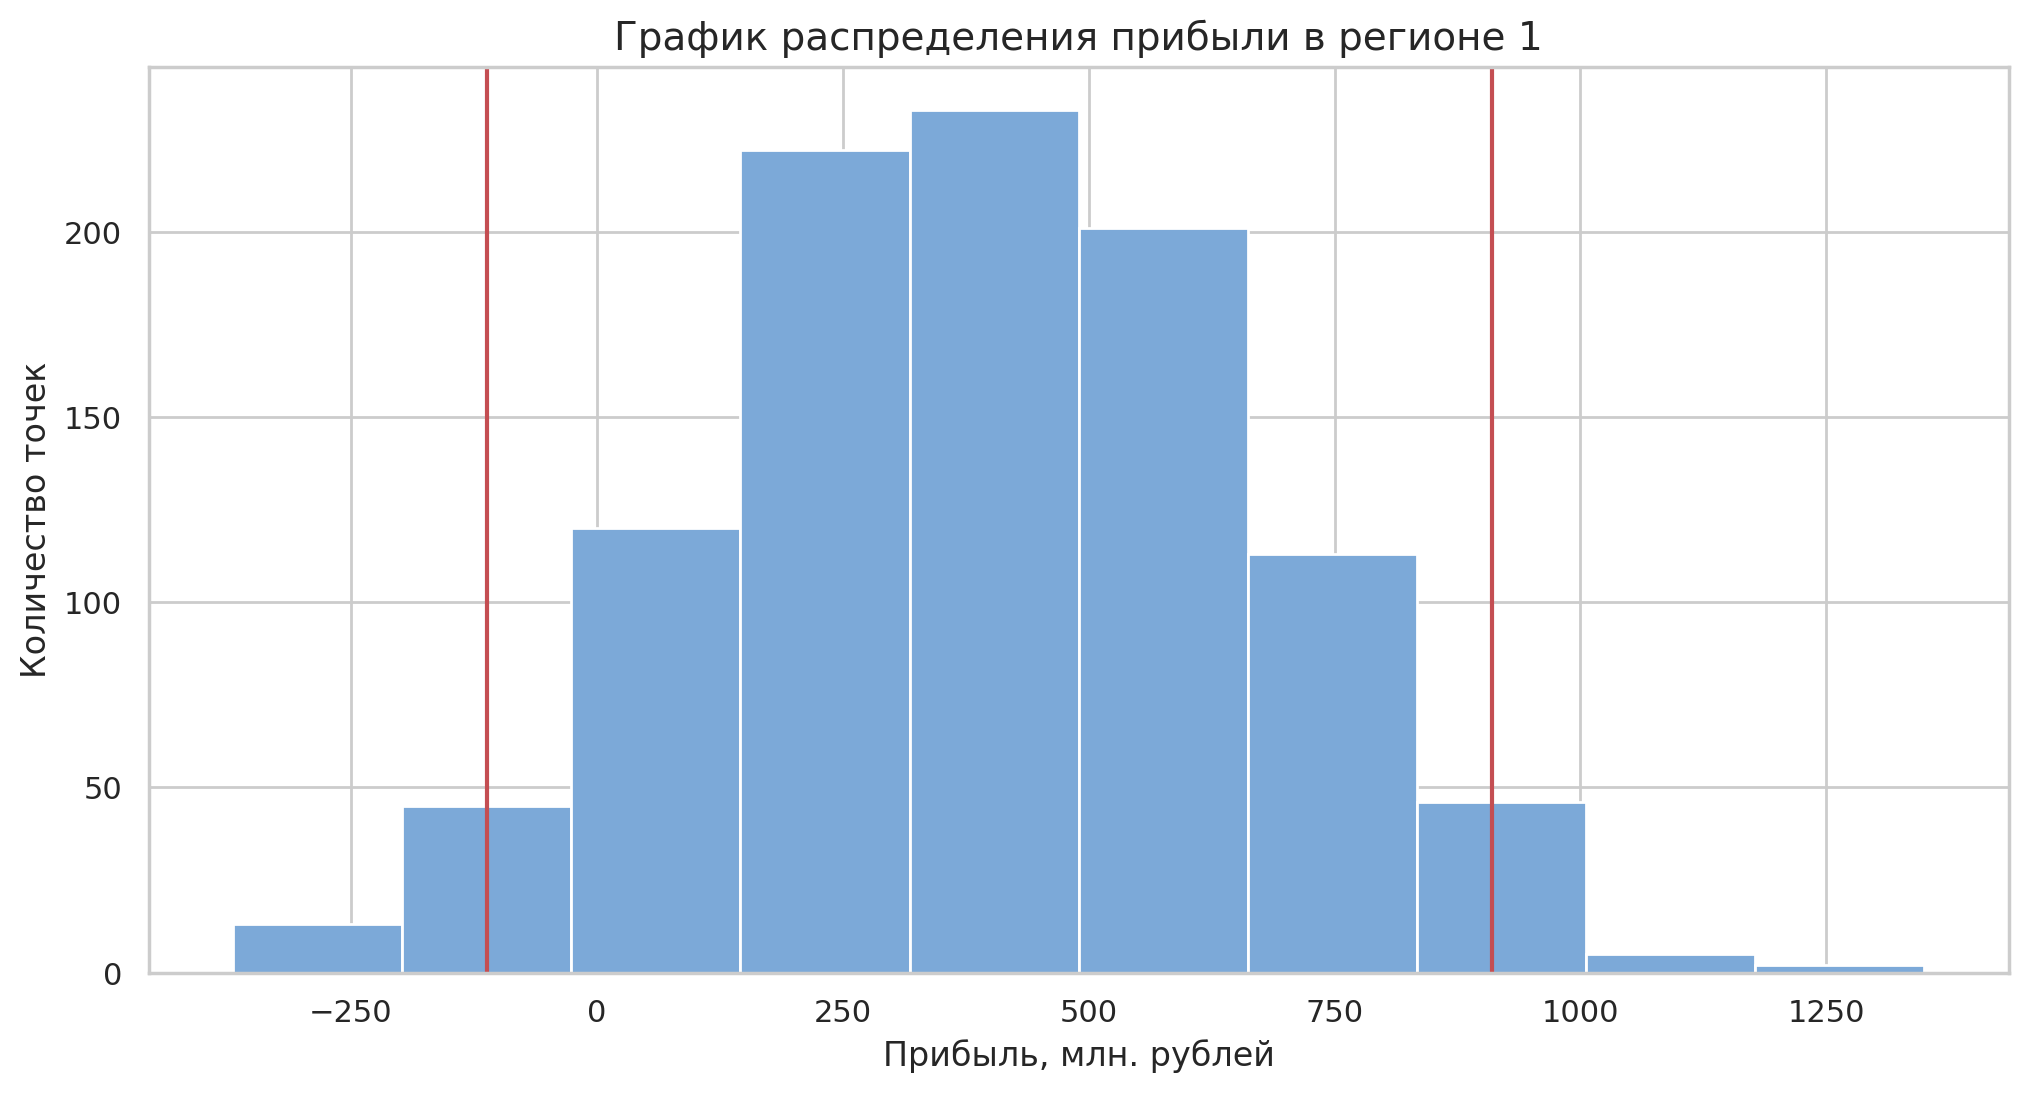

Средняя прибыль: 396.2 млн. рублей
С вероятностью 95% прибыль в данном регионе будет составлять от: -111.2 до 909.8  млн. рублей
Риск убытка: 6.9 %


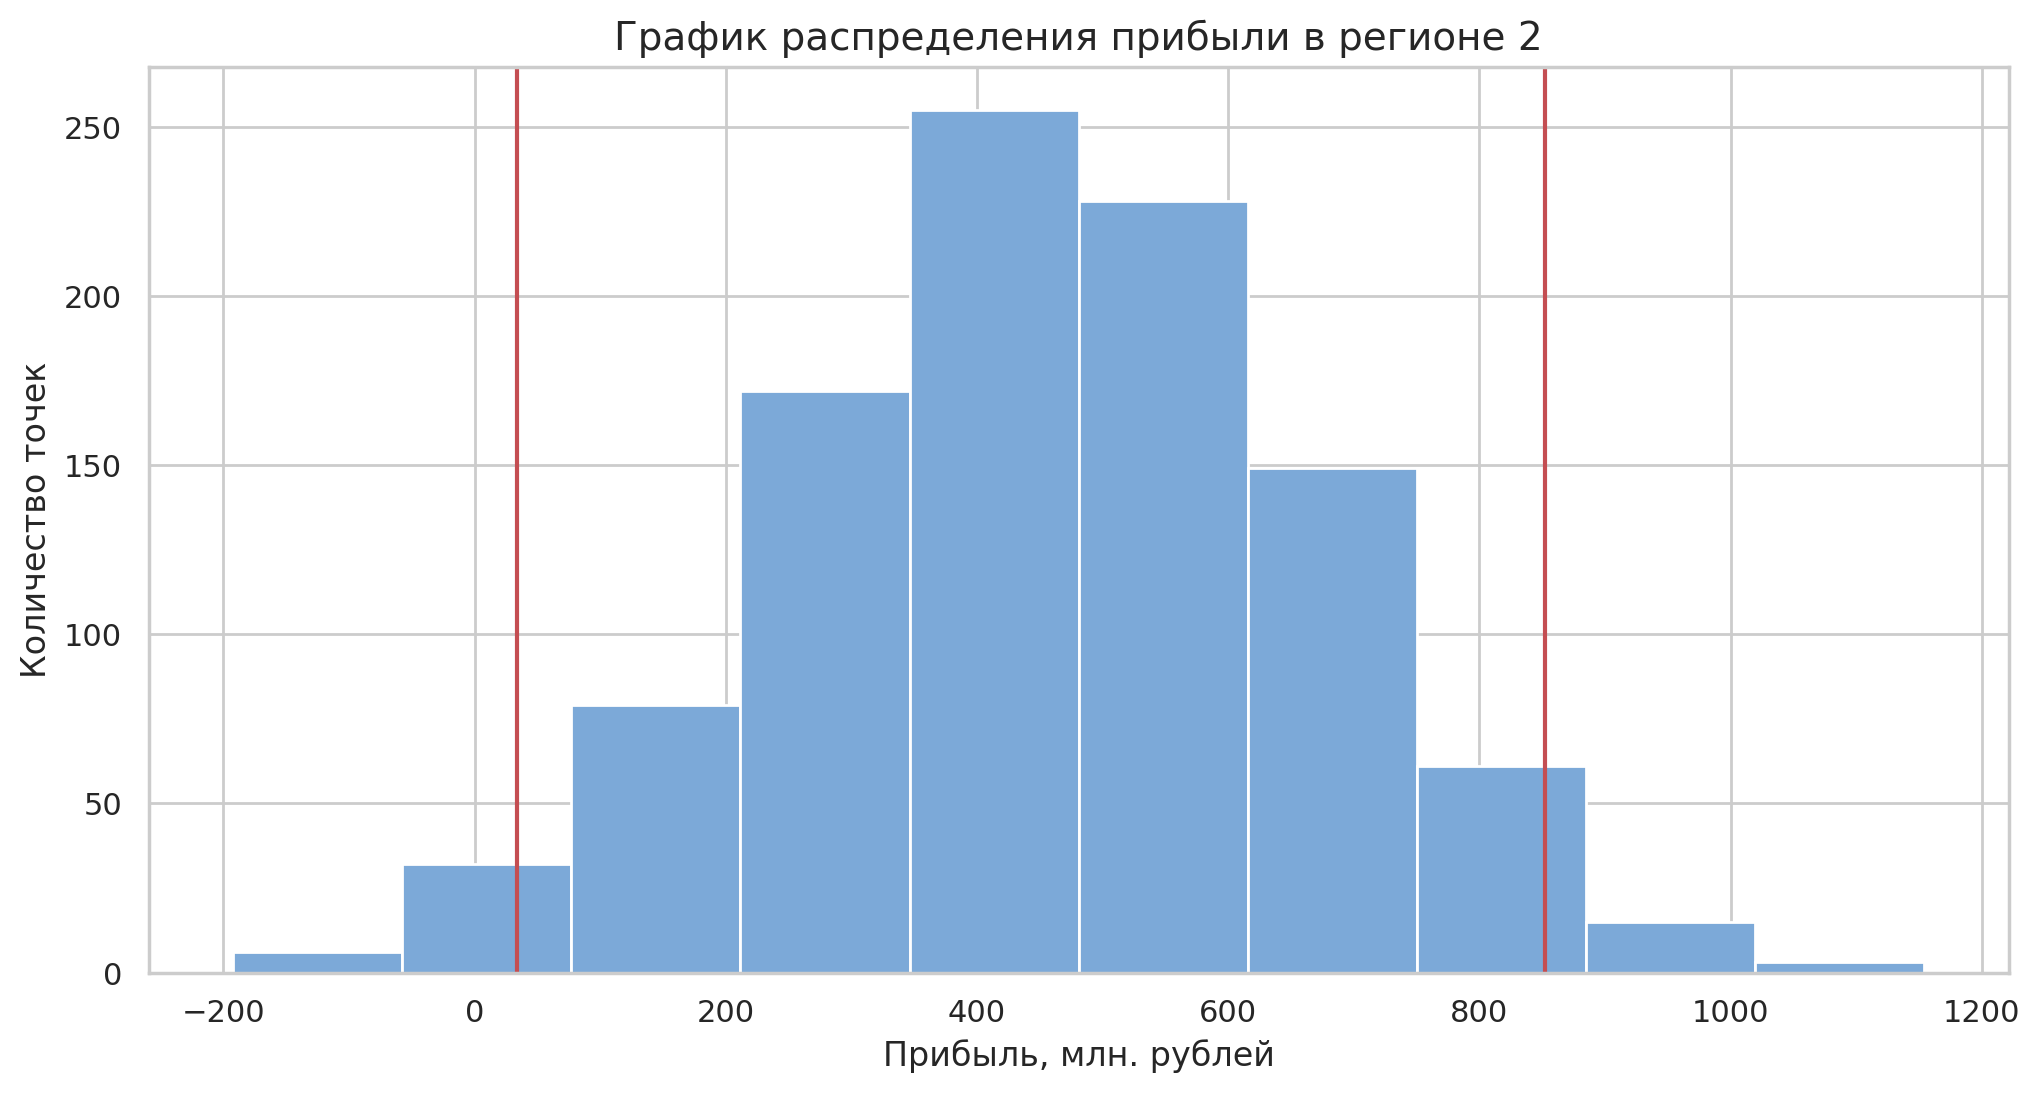

Средняя прибыль: 456.0 млн. рублей
С вероятностью 95% прибыль в данном регионе будет составлять от: 33.8 до 852.3  млн. рублей
Риск убытка: 1.5 %


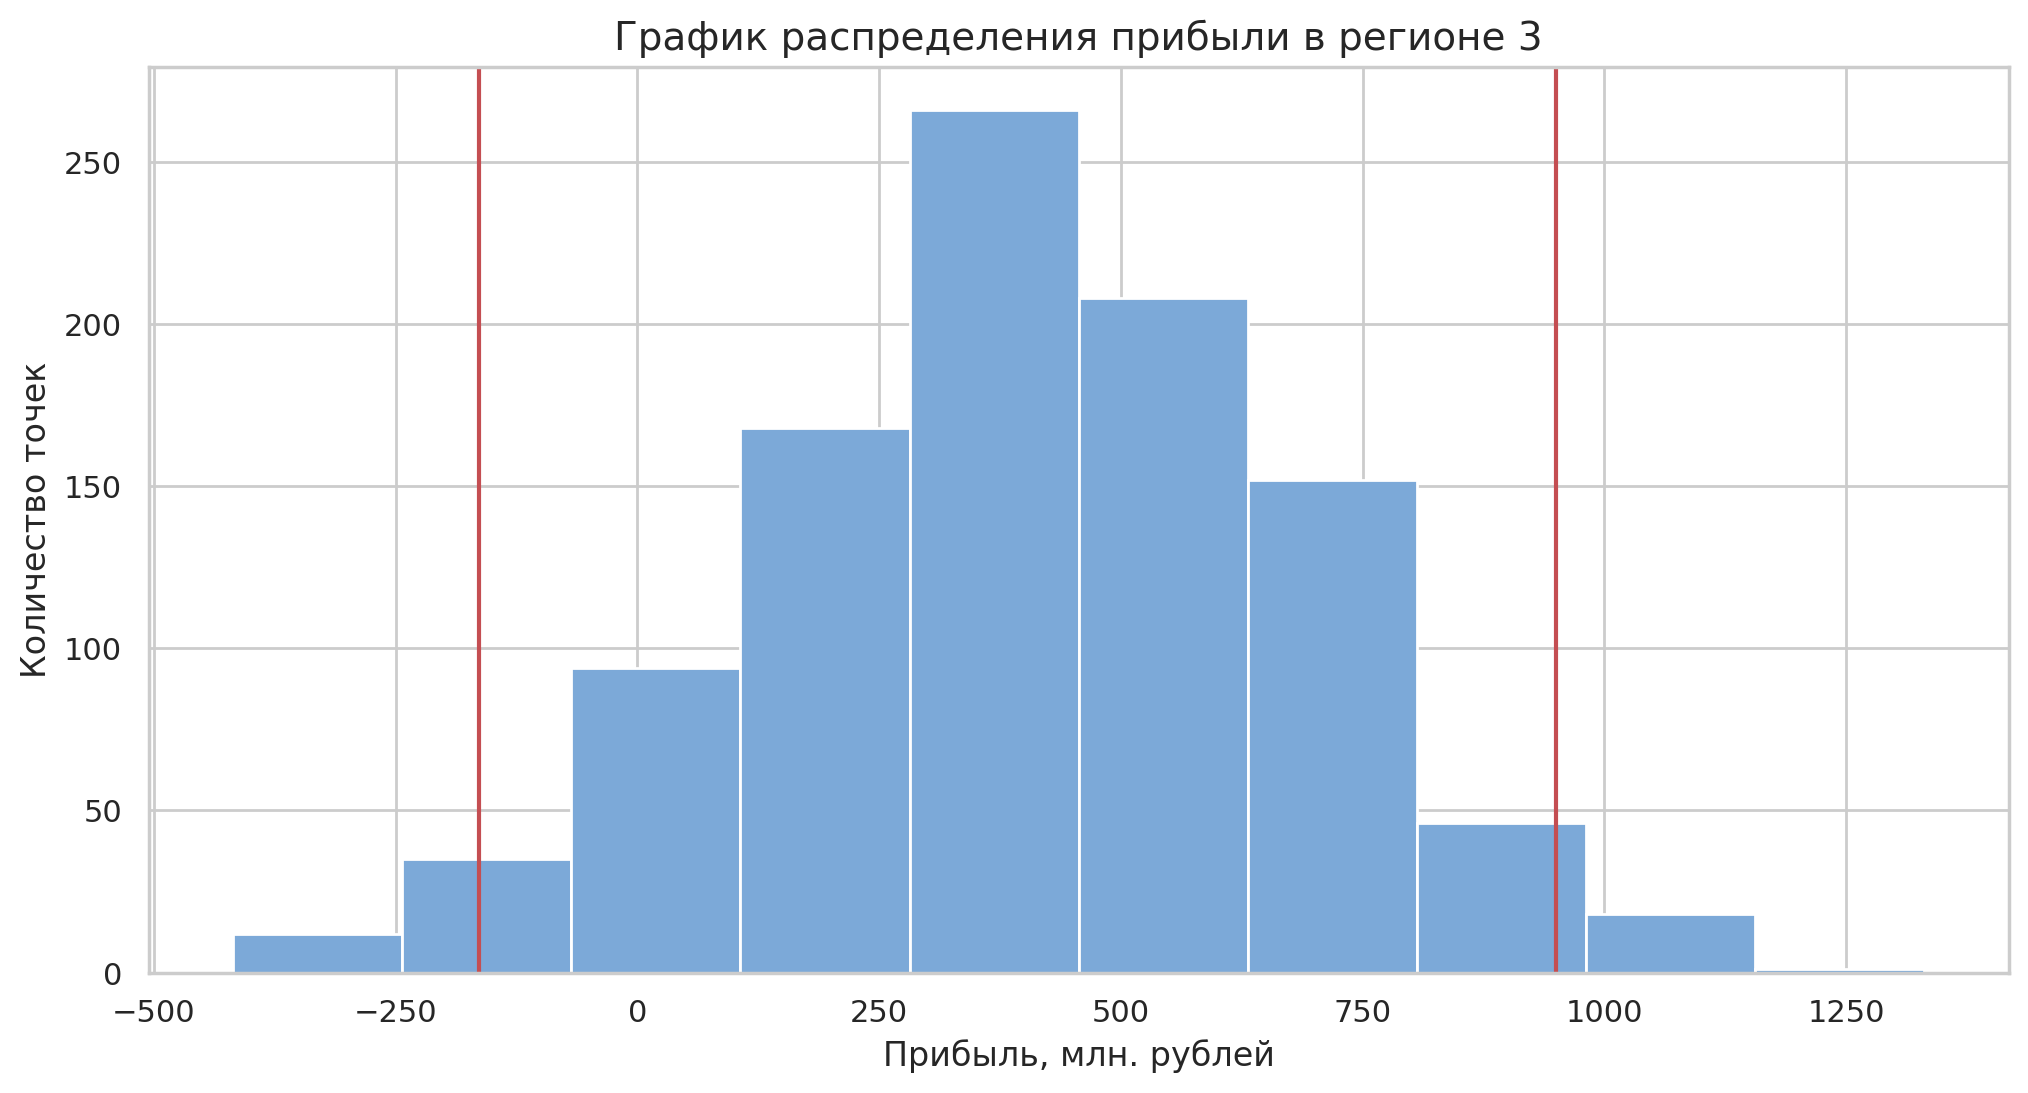

Средняя прибыль: 404.4 млн. рублей
С вероятностью 95% прибыль в данном регионе будет составлять от: -163.4 до 950.4  млн. рублей
Риск убытка: 7.6 %


In [19]:
#применим функцию к каждому региону
bootstrap(target_valid_0, predictions_0, 1)
bootstrap(target_valid_1, predictions_1, 2)
bootstrap(target_valid_2, predictions_2, 3)

### Вывод по этапу "Расчет прибыли и рисков"

1. После анализа видим, что средняя прибыль выше у 2-ого региона (456.0 млн. рублей). Этот же регион имеет самую низкую вероятность убытка (1.5%);


2. Два других региона не прошли отбор по минимально допустимому порогу убытка в 2.5%;


3. Не смотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами, средняя доходность со скважин во втором регионе прогнозируется выше других.

## Шаг 5. Общий вывод 
[Вернуться к содержанию](#link)

Цель настоящего исследования - построить модель, способную спрогнозировать, где бурить новую скважину. Заказчик - добывающая компания «ГлавРосГосНефть». Предоставленные данные - пробы нефти в трёх регионах. Требовалось построить модель для определения региона, где добыча принесёт наибольшую прибыль. А также проанализировать возможную прибыль и риски.


1. Для выполнения поставленной задачи были обработаны данные трёх регионов с 100000 месторождений в каждом.


2. Для прогнозирования объёма запасов в каждом регионе была создана модель линейной регрессии. Наиболее точные предсказания оказались у модели 2-ого региона: средний запас сырья в скважине 68.7 тыс. баррелей при отклонении 0.89. Предсказания по первому и третьему региону оказались схожими между собой.


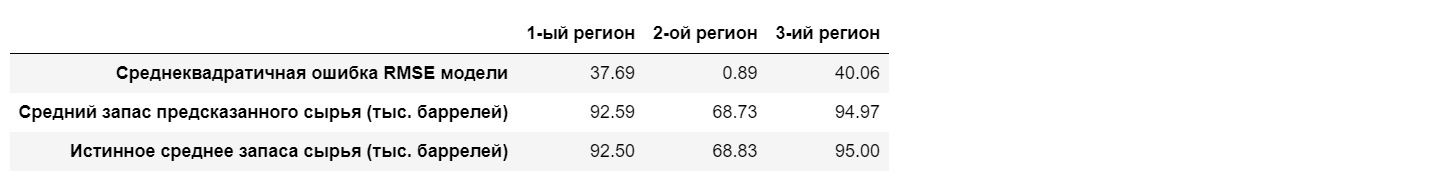

3. При подготовке к расчету прибыли было обнаружено, что средний запас ресурсов по регионам недостаточен для окупаемости вложений на разработку. Однако, после расчета прибыли по выбранным скважинам и предсказаниям модели было выявлено, что все три региона потенциально прибыльные.

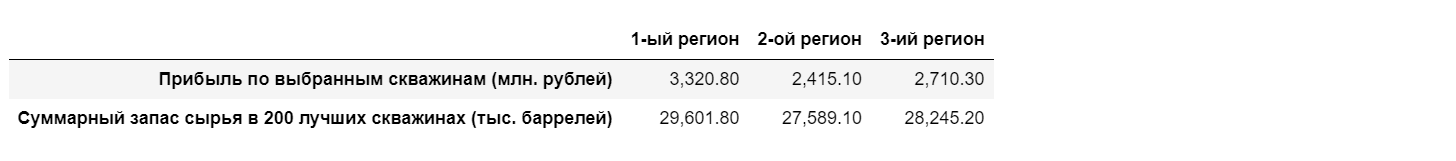

4. Для финальной оценки прибыли и рисков была использована техника bootstrap с 1000 выборок. После анализа было выявлено, что средняя прибыль выше у 2-ого региона (456.0 млн. рублей). Этот же регион имеет самую низкую вероятность убытка (1.5%).

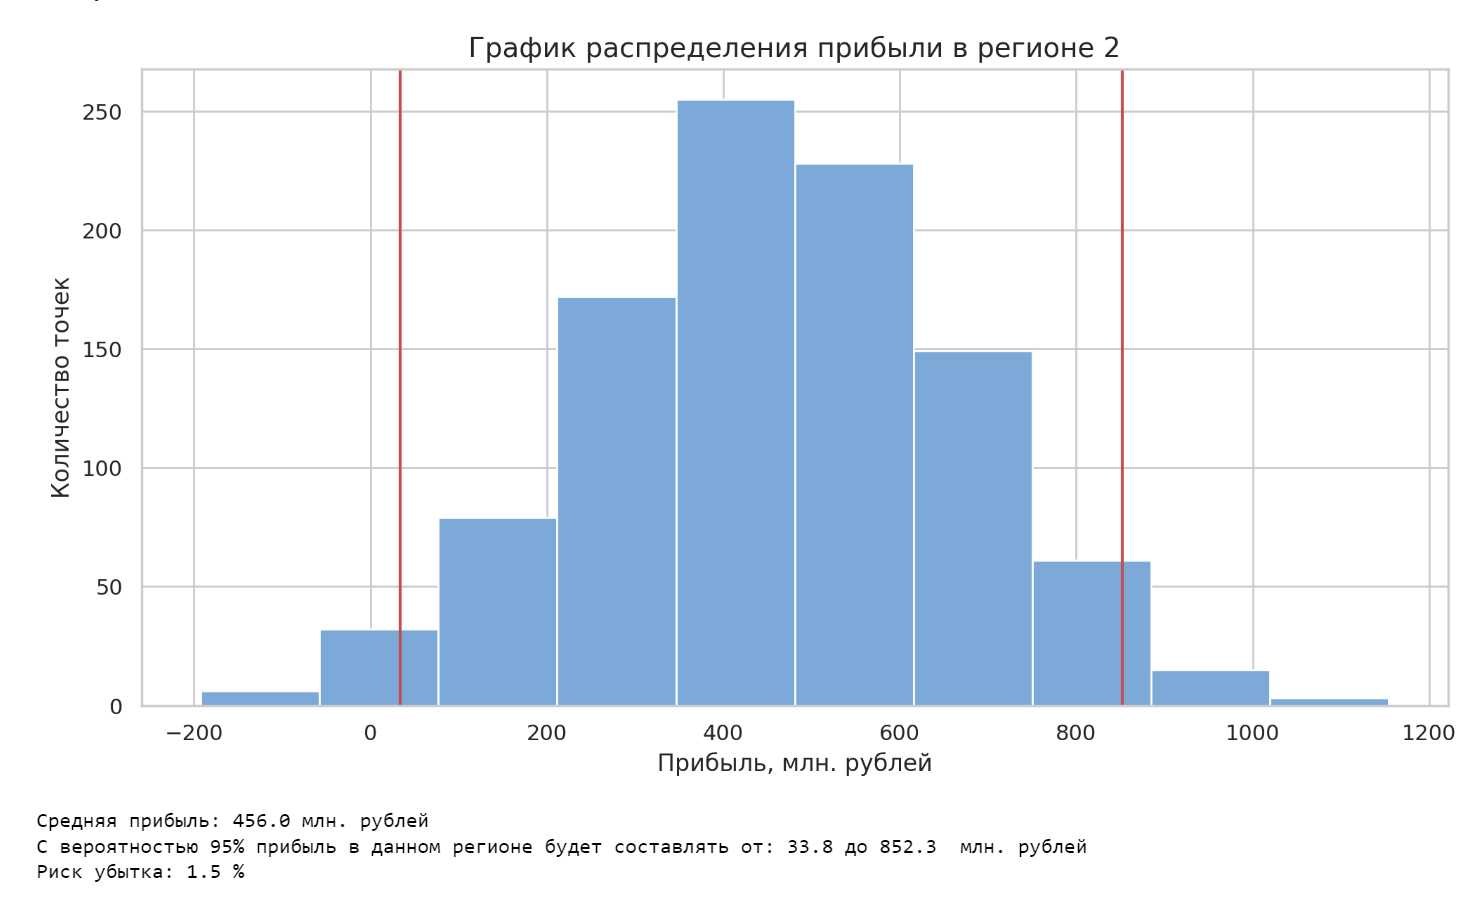

**На основе данных наиболее перспективным регионом для разработки 200 скважин оказался регион №2.**